### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

C:\Users\Zahid\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.13.1'

### Collect Data

In [3]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
# print the shape of training model
print("trainX shape:", trainX.shape, "trainY shape:", trainY.shape)

trainX shape: (60000, 28, 28) trainY shape: (60000,)


In [7]:
# print the shape of test model
print("testX shape:", testX.shape, "testY shape:", testY.shape)

testX shape: (10000, 28, 28) testY shape: (10000,)


In [8]:
# Print the number of training and test datasets
print(trainX.shape[0], 'train set')
print(testX.shape[0], 'test set')

60000 train set
10000 test set


In [9]:
trainY_copy = trainY.copy()

In [10]:
print("Number of train data - " + str(len(trainX)))
print("Number of test data - " + str(len(testX)))

Number of train data - 60000
Number of test data - 10000


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [11]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [12]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [13]:
print(testY.shape)
print('First 5 examples now are: ', testY[0:5])

(10000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [14]:
y = [] # for labels

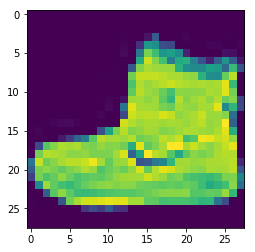

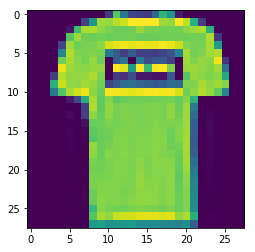

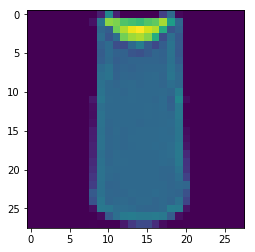

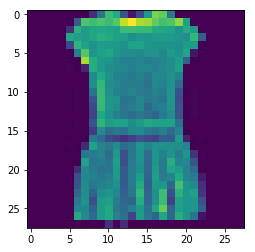

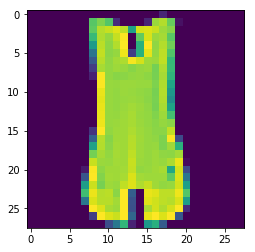

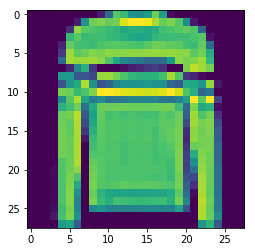

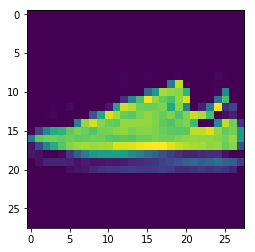

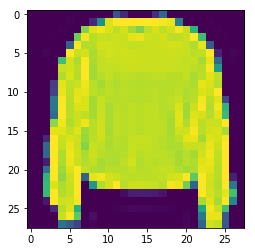

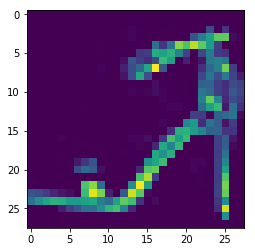

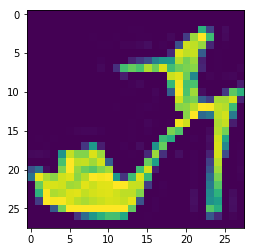

In [15]:
for i in range(10):
    image = trainX[i]
    plt.imshow(image)
    plt.show()
    y.append(trainY_copy[i])

In [16]:
print("label for each of the above image:")
y

label for each of the above image:


[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

### Build the graph

In [17]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

In [18]:
#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [19]:
#Normalize the data
#model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Execute the model using model.fit()

In [20]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=100
          )

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
60000/60000 [==============================] - 4s 71us/sample - loss: 14.5042 - acc: 0.1001 - val_loss: 14.5047 - val_acc: 0.1001
Epoch 2/100
60000/60000 [==============================] - 4s 67us/sample - loss: 13.7317 - acc: 0.1480 - val_loss: 14.5031 - val_acc: 0.1002
Epoch 3/100
60000/60000 [==============================] - 4s 67us/sample - loss: 13.5653 - acc: 0.1583 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 4/100
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 5/100
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 6/100
60000/60000 [==============================] - 4s 71us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 7/100
60000/60000 [=========================

60000/60000 [==============================] - 4s 72us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 57/100
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 58/100
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 59/100
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 60/100
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 61/100
60000/60000 [==============================] - 4s 68us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 62/100
60000/60000 [==============================] - 4s 71us/sample - loss: 12.9130 - acc: 0.1989 - val_loss: 12.9187 - val_acc: 0.1985
Epoch 63/100

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [21]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model ((We will learn about optimizers it in the next residency))
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [22]:
model1.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.6399 - acc: 0.7793 - val_loss: 0.5389 - val_acc: 0.8166
Epoch 2/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4992 - acc: 0.8264 - val_loss: 0.5079 - val_acc: 0.8251
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4730 - acc: 0.8371 - val_loss: 0.4901 - val_acc: 0.8306
Epoch 4/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4575 - acc: 0.8430 - val_loss: 0.4819 - val_acc: 0.8337
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4480 - acc: 0.8458 - val_loss: 0.4790 - val_acc: 0.8318
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4416 - acc: 0.8481 - val_loss: 0.4725 - val_acc: 0.8358
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4367 - acc: 0.8489 - val_loss: 0.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [23]:
from keras import optimizers

In [24]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [25]:
sgd = optimizers.SGD(lr=0.001)

In [26]:
#Comile the model ((We will learn about optimizers it in the next residency))
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
model2.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6481 - acc: 0.7755 - val_loss: 0.5340 - val_acc: 0.8145
Epoch 2/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.5015 - acc: 0.8277 - val_loss: 0.5019 - val_acc: 0.8265
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4729 - acc: 0.8369 - val_loss: 0.4846 - val_acc: 0.8343
Epoch 4/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4590 - acc: 0.8419 - val_loss: 0.4769 - val_acc: 0.8350
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4475 - acc: 0.8454 - val_loss: 0.4708 - val_acc: 0.8371
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.4403 - acc: 0.8496 - val_loss: 0.4660 - val_acc: 0.8386
Epoch 7/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4352 - acc: 0.8509 - val_loss: 0.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [28]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [29]:
model3.add(tf.keras.layers.Dense(100,input_dim=8, activation='relu'))
model3.add(tf.keras.layers.Dense(100,activation='relu'))
model3.add(tf.keras.layers.Dense(10,activation='relu'))
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [30]:
sgd = optimizers.SGD(lr=0.03)

In [31]:
#Comile the model ((We will learn about optimizers it in the next residency))
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model3.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 2.5513 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3026 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3026 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3026 - acc: 0.0988 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 5/10
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3026 - acc: 0.0978 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 2.3026 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 2.3026 - acc: 0.0977 - val_loss: 2.

## Review model

In [33]:
# Take a look at the model summary
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 89,720
Trainable params: 89,720
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Evaluate the model on test set
score = model3.evaluate(testX, testY, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.1


In [35]:
# Take a look at the model2 summary
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 10)                40        
Total params: 11,006
Trainable params: 9,418
Non-trainable params: 1,588
_________________________________________________________________


In [36]:
# Evaluate the model on test set
score = model2.evaluate(testX, testY, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8433


In [37]:
# Take a look at the model1 summary
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [38]:
# Evaluate the model on test set
score = model1.evaluate(testX, testY, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.836


In [39]:
# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Evaluate the model on test set
score = model.evaluate(testX, testY, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.1985


### Run the model

In [44]:
y_hat = model2.predict(testX)

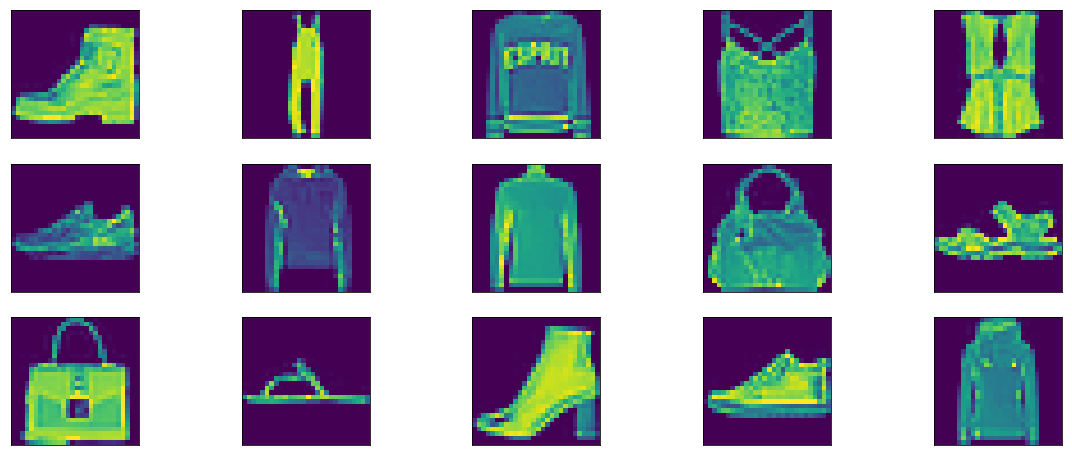

In [45]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(testX.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(testX[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(testY[index])